# Project 1

## Data preprocess

In [247]:
# get all data dir and write to unzip.sh
import os
import time
#import matplotlib
from matplotlib import pyplot as plt
import sorting

In [248]:
path = "./Project1"

# f = open("unzip.sh", "a")

# listOfFiles = list()
# for (dirpath, dirnames, filenames) in os.walk(path):
#     listOfFiles += [os.path.join(dirpath, file) for file in filenames]

# for file in listOfFiles:
#     f.write("gunzip " + file + "\n")

# f.close()

## Data process

In [249]:
# utility func to get all data file
pathA = path+"/A"
pathB = path+"/B"
pathC = path+"/C"

logsA = list()
logsB = list()
logsC = list()
for (dirpath, dirnames, filenames) in os.walk(pathA):
    logsA += [os.path.join(dirpath, file) for file in filenames]

for (dirpath, dirnames, filenames) in os.walk(pathB):
    logsB += [os.path.join(dirpath, file) for file in filenames]

for (dirpath, dirnames, filenames) in os.walk(pathC):
    logsC += [os.path.join(dirpath, file) for file in filenames]

lenA = len(logsA)
lenB = len(logsB)
lenC = len(logsC)
#print(lenA + lenB + lenC)

### Utility: Get data

In [250]:
import gzip
def getData(idx, pathlist):
    length = len(pathlist)
    if(idx < 0 or idx >= length):
        print("index out of bound: ", idx)
        return None

    stamp = []
    data = []

    path = pathlist[idx]
    with gzip.open(path, "rt", encoding = 'latin1') as currLog:
        for line in currLog:
            # get first 19 characters and convert to timestamp
            stringTime = line[:19]
            data.append(line)
            try:
                t = time.strptime(stringTime[0:19], '%Y-%m-%dT%H:%M:%S')
                timeStamp = int(time.mktime(t))     
                # add time stamp to data
                stamp.append(timeStamp)

            except ValueError:
                pass

    return data, stamp

### Utility: plot chart

In [251]:
def plot(xSet, ySet, title):
    # plt.plot(sizeSet, timeSet)   #, label='y = x'
    plt.scatter(xSet, ySet)
    plt.title(title)
    plt.xlabel('Input size')
    plt.ylabel('Time spent (sec)')
    plt.show()

### Utility: Is sorted?

In [252]:
def isSorted(stamp):
    for i in range(1, len(stamp)-1):
        if stamp[i]>stamp[i+1]:
            return False
    return True

## Insertion sort

mark


In [253]:
def insertionSort(data,stamp):
 
    for i in range(1, len(stamp)):
 
        tmpStamp = stamp[i]
        tmpdata = data[i]
        j = i-1
        while j >= 0 and tmpStamp < stamp[j] :
                stamp[j + 1] = stamp[j]
                data[j + 1] = data[j]
                j -= 1
        stamp[j + 1] = tmpStamp
        data[j + 1] = tmpdata
    return data,stamp

In [254]:
def Sort(logs):
    sizeSet = []
    timeSet = []
    
    for logIdx in range(len(logs)):
        data, stamp = getData(logIdx, logs)
        size = len(data)
        sizeSet.append(size)
        currTime = time.time()

        insertionSort(data, stamp)
        
        endTime = time.time()
        timeSet.append(endTime - currTime)
        
        if isSorted(stamp):
            print("File %d.log is sorted" %size)
        else:
            print("File %d.log is not sorted" %size)
    return sizeSet, timeSet
    
    

In [255]:
sizeSetA, timeSetA = Sort(logsA)

File 1.log is sorted
File 1024.log is sorted
File 128.log is sorted
File 16.log is sorted
File 2.log is sorted
File 2048.log is sorted
File 256.log is sorted
File 32.log is sorted
File 4.log is sorted
File 512.log is sorted
File 64.log is sorted
File 8.log is sorted


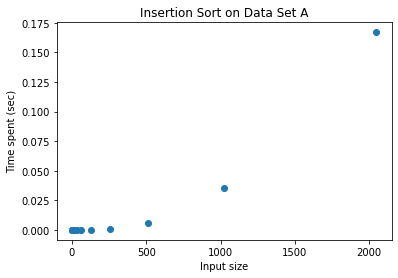

In [256]:
plot(sizeSetA, timeSetA, "Insertion Sort on Data Set A")

## Merge sort

### Utility: test data set

In [257]:
def test(logs):
    sizeSet = []
    timeSet = []
    for logIdx in range(len(logs)):
        data,stamp = getData(logIdx, logs)
        sizeSet.append(len(data))
        currTime = time.time()
        sorting.merge(stamp)
        
        endTime = time.time()
        timeSet.append(endTime - currTime)
        # print("curr log: %d, time spent: %d, total time: %d" %(logIdx, endTime - currTime, endTime - totalStart))

    return sizeSet, timeSet
    # print()
    

#### Data set A

In [258]:
sizeSetA, timeSetA = test(logsA)

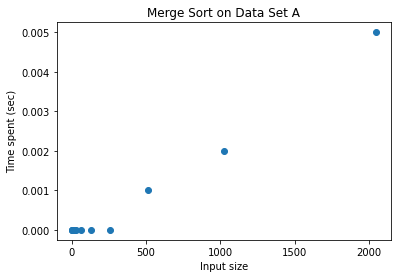

In [259]:
plot(sizeSetA, timeSetA, "Merge Sort on Data Set A")

#### Data set B

In [260]:
#sizeSetB, timeSetB = test(logsB)

In [261]:
#plot(sizeSetB, timeSetB, "Merge Sort on Data Set B")

#### Data set C

In [262]:
#sizeSetC, timeSetC = test(logsC)

In [263]:
#plot(sizeSetC, timeSetC, "Merge Sort on Data Set C")

## Adaptive sort
Using python built-in sort() algorithm which is Timsort

### Utility: test data set

In [264]:
def test(logs):
    sizeSet = []
    timeSet = []
    for logIdx in range(len(logs)):
        data,stamp = getData(logIdx, logs)
        sizeSet.append(len(data))
        currTime = time.time()

        stamp.sort()
        
        endTime = time.time()
        timeSet.append(endTime - currTime)
        # print("curr log: %d, time spent: %d, total time: %d" %(logIdx, endTime - currTime, endTime - totalStart))

    return sizeSet, timeSet
    # print()
    

#### Data set A

In [265]:
sizeSetA, timeSetA = test(logsA)

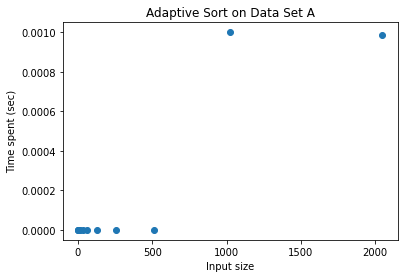

In [266]:
plot(sizeSetA, timeSetA, "Adaptive Sort on Data Set A")

#### Data set B

In [267]:
#sizeSetB, timeSetB = test(logsB)

In [268]:
#plot(sizeSetB, timeSetB, "Adaptive Sort on Data Set B")

#### Data set C

In [269]:
#sizeSetC, timeSetC = test(logsC)

In [270]:
#plot(sizeSetC, timeSetC, "Adaptive Sort on Data Set C")